In [48]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th

## Q.No.1 FNNs vs. CNNs
 a) About **parameter efficiency**, Fully connected Neural Networks require a huge number of parameters as it is fully connected making training spend longer time. About **spatial hierarchies**, FNN can not capture the spatial structure of the image(directly flatten the image) and capture high-level features. About **translation invariance**, FNN is sensitive to the translation which means a little shift of the image can significantly affect the out put of FNN.


b)convolutional layers and pooling, use the kernel or pooling layer going through the image which can capture spatial structure of the image, as the weight of kernal is applied across the input, the number of the parameter is reduced. The trade-off is that early CNN(LeNet-5) is not deep enough so it can not capture deeper feature(focus too much on local information), and the model may overfit as it has no dropout layer. 

c)**valid padding**: there is no padding and output size may become samller. **same padding**: add the padding making the output size the same as the input. **causal padding**: make sure the output in a certain time just rely on the current time but not the furture time. **zero-padding**: padding with zero around the image, **reflective padding**: use the reflection of the image as the padding. **replication padding**: repeat the value at the edge as the padding.

## Q. No. 2 Evolution of Early CNNs and Their Limitations
a) **depth**: early CNNs have a few layers which makes them hard to capture deeper and more complex features. **vanishing gradient**: during backpropagation the gradient may vanihsing if the model become deeper making them hard to train. **computational cost**, early CNNs need high computation cost(also hardware resources is limited). Limitations above make early CNNs have poor scalability and generalization, the model is hard to train and may overfit. 

b)**activation function** like Relu compared with sigmoid and tahnh can avoid the vanish of gradient and enable deeper networks. **Dropout** randomly drop some neurals when training can prevent overfit which makes the model have better gerneralization ability. **GPU** can accurate the process of training making it faster to train a neural network.

## Q. No. 3 Architectural Advances in Modern CNNs

a) ResNet introduce **residual connections** which perform as f(x)+x, x is the input and f(x) is a transformation, Adding residual block is the same as add a constant on the gradient whcih makes the gradient can pass one or more layers, it solve the problem of gradient vanish and also reuse the feature from the previous output.  For **DenseNet** introduce dense connections, each layer receive input from all previous layers, it can improve the gradient flow and highly reuse the feature across layers, but it will spend more computation resources and become overfit.

b) Earlier CNNs optmize the depth of model by more layers and width by more channels and resolution by increase input image size. For EfficientNet it uses a compound coefficient ($\phi$) to scale the depth, width, resolution which is optimized by neural architecture search denoted by . 
\begin{equation}
\text{depth} = d^{\phi}, \quad \text{width} = w^{\phi}, \quad \text{resolution} = r^{\phi}
\end{equation}


## Q. No. 4 Transfer Learning in CNNs: From Feature Extraction to Fine Tuning

a) pre-trained model generalize well to new tasks despite begin trained on different datasets beacuse of the hierarchical feature learning. It means the early and middle layers can learn some low-level features(color, edge, shape) these features are common in image, so on a new datasets these kind of features can be reused.

b) feature extraction is preferable when the new dataset is similar to the original one or the dataset is small, and the computational resources is limited(feature extraction is faster than fine-tuning the whole model). If the domain shift is large than fine-tuning the whole model is better because the low-level features may can not be reused. If the shift is small than feature extraction is better.


## Q. No. 5 Atentional Mechanisms and Beyond CNNs

a) key advantages of self-attention: self-attention can capture more global field becasue the token can be flexibly add to other token,  but CNN use kernel which capture the local feature. self-attention also can dynamically assign the weight to different elements but the weight in CNN kernels is fixed. Additionally self-attition is more flexible to its input shape.

b)because it uses the advantage from both CNN and transformer. It can capture local features(CNN) and global features(transformer) and it is more efficient because transformer need more computational resources.

## Q. No. 6 LeNet-5 on Fashion-MNIST

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F

"""
load FashionMNIST data
"""
transform = transforms.Compose([ # normlization and reshape
    transforms.Resize((32, 32)),  
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset_fashionMNIST = datasets.FashionMNIST(root='./data', train=True, download=False, transform=transform)
test_dataset_fashionMNIST = datasets.FashionMNIST(root='./data', train=False, download=False, transform=transform)

train_loader_fashionMNIST = DataLoader(train_dataset_fashionMNIST, batch_size=64, shuffle=True)
test_loader_fashionMNIST = DataLoader(test_dataset_fashionMNIST, batch_size=64, shuffle=False)

In [6]:
# train and test function
import matplotlib.pyplot as plt

def plot_loss(train_loss, test_loss):
    """
    training and testing loss with the epoch
    
    """
    epochs = range(1, len(train_loss) + 1)
    
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_loss, label='Train Loss', marker='o')
    plt.plot(epochs, test_loss, label='Test Loss', marker='s')
    
    plt.title('Loss vs Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_accuracy(train_acc, test_acc):
    """
    training and testing accuracy with epoch
    """
    epochs = range(1, len(train_acc) + 1)
    
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_acc, label='Train Accuracy (%)', marker='o')
    plt.plot(epochs, test_acc, label='Test Accuracy (%)', marker='s')
    
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    #plt.ylim(70, 100)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def get_loss(test_loader, model,criterion, device='cpu'):
    """
    compute the normalized loss on the test loader
    """
    loss_all=0
    num=0
    with torch.no_grad():
        for images, labels in test_loader:
            num += labels.size(0)
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss_all+=criterion(outputs, labels).item()

    return loss_all/num
def get_acc(test_loader, model,criterion, device='cpu'):
    """
    compute the accuracy on the test loader
    """
    correct=0
    num=0
    with torch.no_grad():
        for images, labels in test_loader:
            num += labels.size(0)
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            correct += (predicted == labels).sum().item()
  
    return 100*(correct/num)

def train(model,train_loader,test_loader,optimizer,criterion,epoch=10,plot=1,device='cpu'):
    """
    train function
    """
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epoch)# schedular
    train_loss=[]
    test_loss=[]

    train_acc=[]
    test_acc=[]
    for i in range(epoch):
        model.train()
        running_loss = 0.0 
        for batch_idx, data in enumerate(train_loader, 0):
            inputs, target = data
            inputs, target = inputs.to(device) , target.to(device)
            optimizer.zero_grad()
            #print(batch_idx)

            # forward + backward + update
            outputs = model(inputs)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        # select a fit number to show the loss
        if i%3==0 :
            print('epoch: %d loss:%.3f ' % (i,running_loss), end=' ')
            test(train_loader,model,criterion,nm='train',device=device)
        scheduler.step()

        if plot==1:

            train_loss.append(get_loss(train_loader, model,criterion, device))
            test_loss.append(get_loss(test_loader, model,criterion, device))
            train_acc.append(get_acc(train_loader, model,criterion, device))
            test_acc.append(get_acc(test_loader, model,criterion, device))
    if plot==1:
        plot_accuracy(train_acc,test_acc)
    #print(train_acc)
        plot_loss(train_loss,test_loss)




def test(test_loader,model,criterion,nm='',device='cpu'):
    """
    test the top-1 accuracy and loss  
    """
    correct = 0
    total = 0
    loss_all=0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device) , labels.to(device)
            
            outputs = model(images)
            loss_all+=criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, dim=1)
            
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on {nm} set: {100 * correct / total:.2f} %',end=' ')
    print(f'Loss total on {nm} set: {loss_all:.2f}')




train LeNet-5 with relu
epoch: 0 loss:608.295  Accuracy on train set: 82.28 % Loss total on train set: 430.79
epoch: 3 loss:304.448  Accuracy on train set: 88.95 % Loss total on train set: 284.24
epoch: 6 loss:243.466  Accuracy on train set: 90.97 % Loss total on train set: 233.28
epoch: 9 loss:215.205  Accuracy on train set: 91.71 % Loss total on train set: 213.50


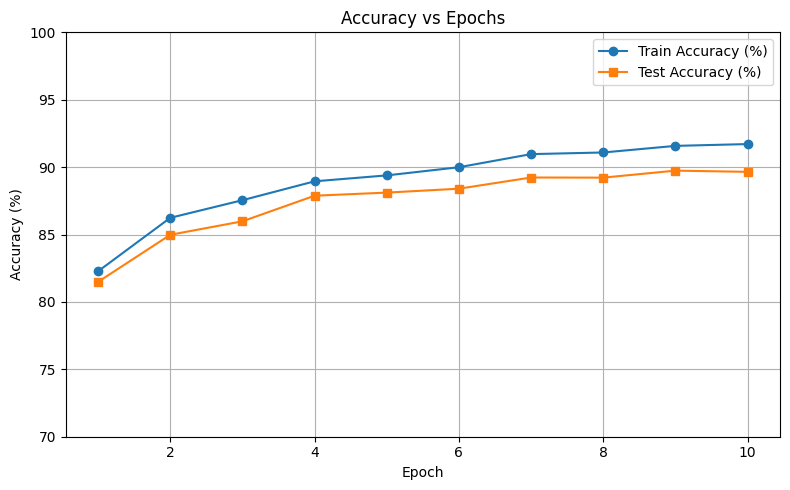

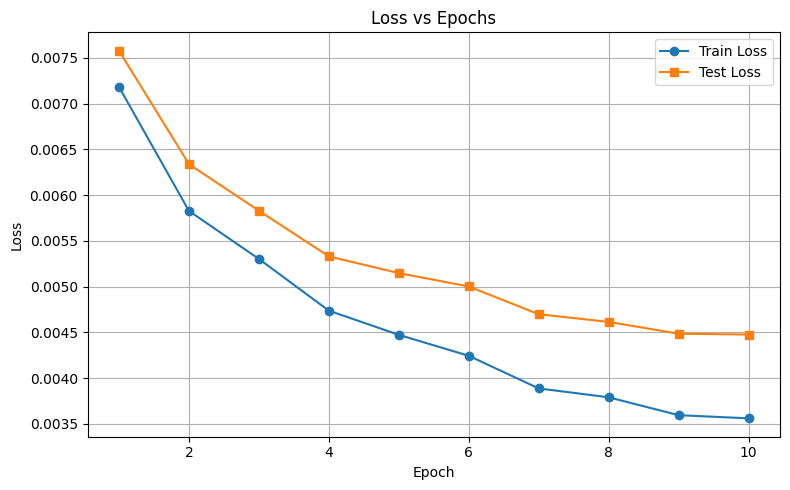

In [ ]:
class LeNet5(nn.Module):
    def __init__(self, activation=nn.ReLU()):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.AvgPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.activation = activation

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return self.fc3(x)

print('train LeNet-5 with relu')
model_LeNet_relu = LeNet5()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_LeNet_relu.parameters(), lr=0.001, weight_decay=1e-4) 
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_LeNet_relu.to(device)

# train the model
train(model_LeNet_relu,train_loader_fashionMNIST,test_loader_fashionMNIST,optimizer,criterion,epoch=10,device=device) 

In [ ]:



print('train LeNet-5 with sigmoid')
model_LeNet_sigmoid = LeNet5(activation=nn.Sigmoid())
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_LeNet_sigmoid.parameters(), lr=0.001, weight_decay=1e-4) 
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_LeNet_sigmoid.to(device)
train(model_LeNet_sigmoid,train_loader_fashionMNIST,test_loader_fashionMNIST,optimizer,criterion,epoch=10,plot=0,device=device) 

print('train LeNet-5 with tanh')
model_LeNet_tanh = LeNet5(activation=nn.Tanh())
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_LeNet_tanh.parameters(), lr=0.001, weight_decay=1e-4) 
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_LeNet_tanh.to(device)
train(model_LeNet_tanh,train_loader_fashionMNIST,test_loader_fashionMNIST,optimizer,criterion,epoch=10,plot=0,device=device) 




train LeNet-5 with sigmoid
epoch: 0 loss:1060.693  Accuracy on train set: 73.19 % Loss total on train set: 667.60
epoch: 3 loss:497.936  Accuracy on train set: 80.63 % Loss total on train set: 475.89
epoch: 6 loss:440.356  Accuracy on train set: 82.22 % Loss total on train set: 444.42
epoch: 9 loss:420.749  Accuracy on train set: 83.50 % Loss total on train set: 419.98
train LeNet-5 with tanh
epoch: 0 loss:544.305  Accuracy on train set: 85.02 % Loss total on train set: 390.35
epoch: 3 loss:289.908  Accuracy on train set: 89.52 % Loss total on train set: 268.35
epoch: 6 loss:230.617  Accuracy on train set: 91.36 % Loss total on train set: 223.39
epoch: 9 loss:201.931  Accuracy on train set: 92.39 % Loss total on train set: 200.73


In [62]:
model_LeNet_relu.eval()
print('LeNet-5 with relu :')
test(test_loader_fashionMNIST,model_LeNet_relu,criterion,nm='test',device=device)

model_LeNet_sigmoid.eval()
print('LeNet-5 with sigmoid :')
test(test_loader_fashionMNIST,model_LeNet_sigmoid,criterion,nm='test',device=device)

model_LeNet_tanh.eval()
print('LeNet-5 with tanh :')
test(test_loader_fashionMNIST,model_LeNet_tanh,criterion,nm='test',device=device)

LeNet-5 with relu :
Accuracy on test set: 89.65 % Loss total on test set: 44.76
LeNet-5 with sigmoid :
Accuracy on test set: 82.41 % Loss total on test set: 74.80
LeNet-5 with tanh :
Accuracy on test set: 89.50 % Loss total on test set: 46.15


In [ ]:
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.l1 = torch.nn.Linear(1024, 512)  
        self.l2 = torch.nn.Linear(512, 256)  
        self.l3 = torch.nn.Linear(256, 128) 
        self.l4 = torch.nn.Linear(128, 64)  
        self.l5 = torch.nn.Linear(64, 5)    

    def forward(self, x):
        x = x.view(-1, 3072)         
        x = F.relu(self.l1(x))      
        x = F.relu(self.l2(x))      
        x = F.relu(self.l3(x))     
        x = F.relu(self.l4(x))      
        return self.l5(x)

model_MLP = LeNet5()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_MLP.parameters(), lr=0.001, weight_decay=1e-4) 
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_MLP.to(device)

train(model_MLP,train_loader_fashionMNIST,test_loader_fashionMNIST,optimizer,criterion,epoch=10,plot=0,device=device)   
print('MLP :')
test(test_loader_fashionMNIST,model_MLP,criterion,nm='test',device=device)

epoch: 0 loss:628.398  Accuracy on train set: 82.26 % Loss total on train set: 461.20
epoch: 3 loss:328.278  Accuracy on train set: 87.43 % Loss total on train set: 316.60
epoch: 6 loss:269.875  Accuracy on train set: 89.61 % Loss total on train set: 261.03
epoch: 9 loss:240.524  Accuracy on train set: 90.63 % Loss total on train set: 238.63
MLP :
Accuracy on test set: 88.71 % Loss total on test set: 49.19


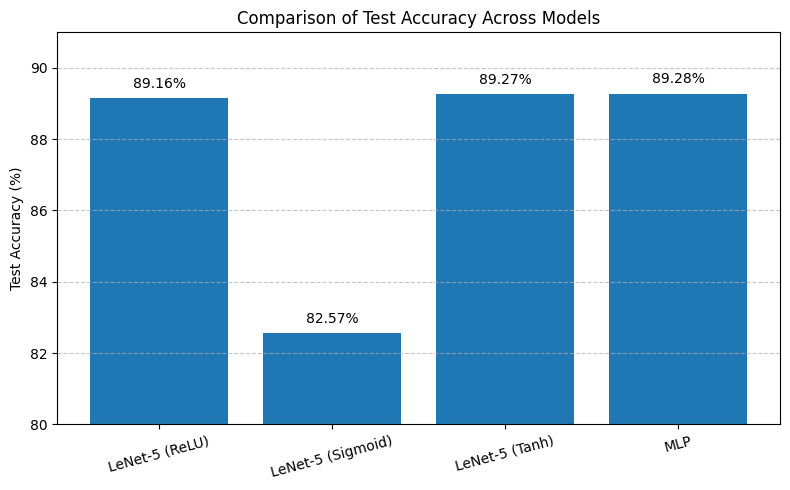

'\nas we can see from the result LeNet-5 with Relu and Tanh and MLP have similar performance on test set.\n'

In [ ]:
import matplotlib.pyplot as plt

# visualization of  the result compare LeNet with different actrivation function and MLP
models = [
    "LeNet-5 (ReLU)",
    "LeNet-5 (Sigmoid)",
    "LeNet-5 (Tanh)",
    "MLP"
]
accuracies = [
    get_acc(test_loader_fashionMNIST, model_LeNet_relu,criterion, device=device),
    get_acc(test_loader_fashionMNIST, model_LeNet_sigmoid,criterion, device=device),
    get_acc(test_loader_fashionMNIST, model_LeNet_tanh,criterion, device=device),
    get_acc(test_loader_fashionMNIST, model_MLP,criterion, device=device)
]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies)
plt.ylabel("Test Accuracy (%)")
plt.title("Comparison of Test Accuracy Across Models")
plt.ylim(80, 91)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{yval:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

"""
as we can see from the result LeNet-5 with Relu and Tanh and MLP have similar performance on test set.
"""


## Q. No. 7 AlexNet on CIFAR-10

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# training data preprocess with data augmentation
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),# random flip
    transforms.RandomRotation(10), # rotations
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset_cifar10 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_loader_cifar10 = torch.utils.data.DataLoader(train_dataset_cifar10, batch_size=128, shuffle=True)

test_dataset_cifar10 = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader_cifar10 = torch.utils.data.DataLoader(test_dataset_cifar10, batch_size=128, shuffle=False)

classes = train_dataset_cifar10.classes


In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class AlexNet(nn.Module):
    # AlexNet  (5 Conv layers, 3 FC layers, ReLU, MaxPooling, Dropout)
    def __init__(self, num_classes=10, use_dropout=True):
        super(AlexNet, self).__init__()
        self.use_dropout = use_dropout
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),  
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),      

            nn.Conv2d(64, 192, kernel_size=3, padding=1),  
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),         

            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, padding=1), 
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)          
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 1024), 
            nn.ReLU(inplace=True),
            nn.Dropout(0.2) if use_dropout else nn.Identity(),# add the dropout
            nn.Linear(1024, 512),         
            nn.ReLU(inplace=True),
            nn.Dropout(0.2) if use_dropout else nn.Identity(),
            nn.Linear(512, num_classes)   
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

AlexNet(use_dropout=True)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=1024, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.2,

cuda
epoch: 0 loss:650.933  Accuracy on train set: 52.07 % Loss total on train set: 513.99
epoch: 3 loss:338.416  Accuracy on train set: 72.18 % Loss total on train set: 306.44
epoch: 6 loss:241.347  Accuracy on train set: 79.13 % Loss total on train set: 232.44
epoch: 9 loss:181.513  Accuracy on train set: 85.01 % Loss total on train set: 169.61
epoch: 12 loss:131.780  Accuracy on train set: 89.68 % Loss total on train set: 115.51
epoch: 15 loss:94.415  Accuracy on train set: 92.50 % Loss total on train set: 85.61
epoch: 18 loss:74.209  Accuracy on train set: 93.72 % Loss total on train set: 72.38


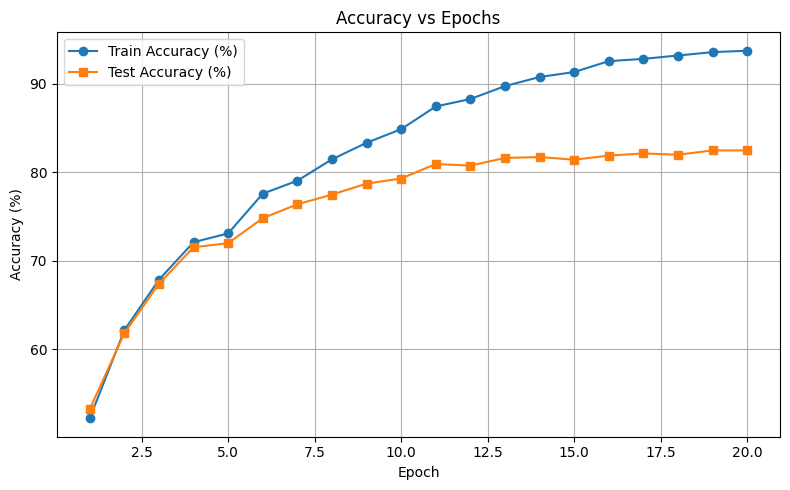

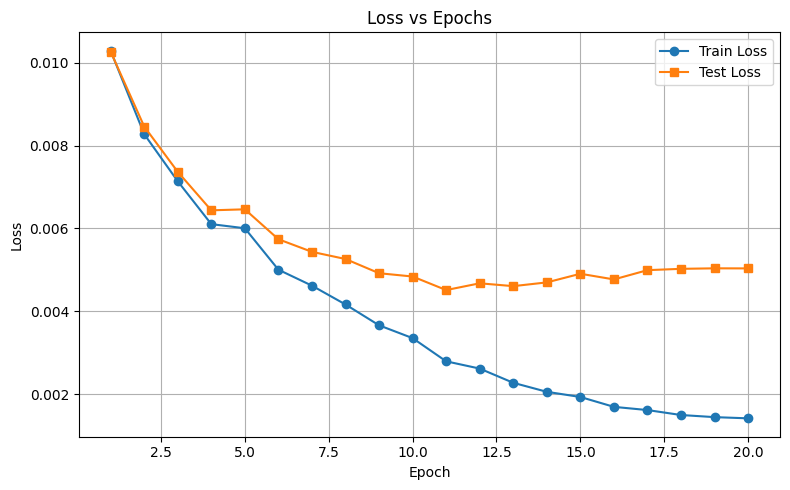

In [57]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# model without Dropout
model_no_dropout = AlexNet(use_dropout=False).to(device)
optimizer = optim.Adam(model_no_dropout.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train(model_no_dropout,train_loader_cifar10,test_loader_cifar10,optimizer,criterion,epoch=20,device=device) 


epoch: 0 loss:663.648  Accuracy on train set: 48.85 % Loss total on train set: 540.88
epoch: 3 loss:345.048  Accuracy on train set: 70.31 % Loss total on train set: 328.04
epoch: 6 loss:250.513  Accuracy on train set: 80.07 % Loss total on train set: 223.54
epoch: 9 loss:195.995  Accuracy on train set: 84.50 % Loss total on train set: 174.50
epoch: 12 loss:147.462  Accuracy on train set: 87.55 % Loss total on train set: 139.47
epoch: 15 loss:115.396  Accuracy on train set: 90.41 % Loss total on train set: 107.29
epoch: 18 loss:96.553  Accuracy on train set: 91.50 % Loss total on train set: 95.26


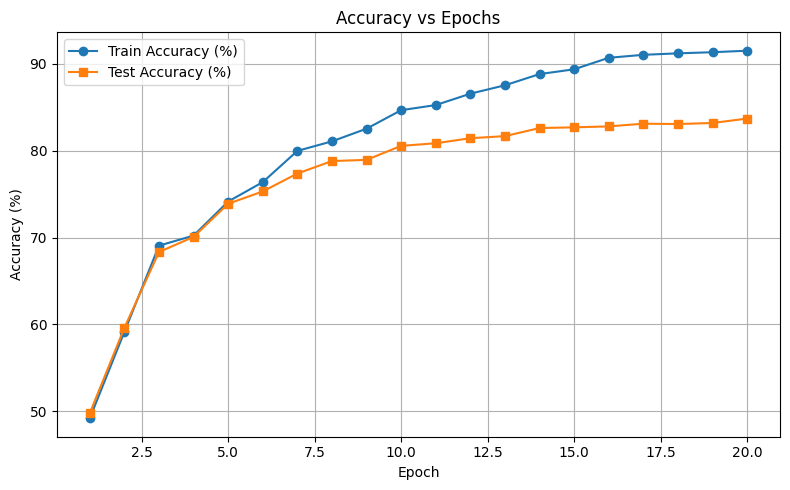

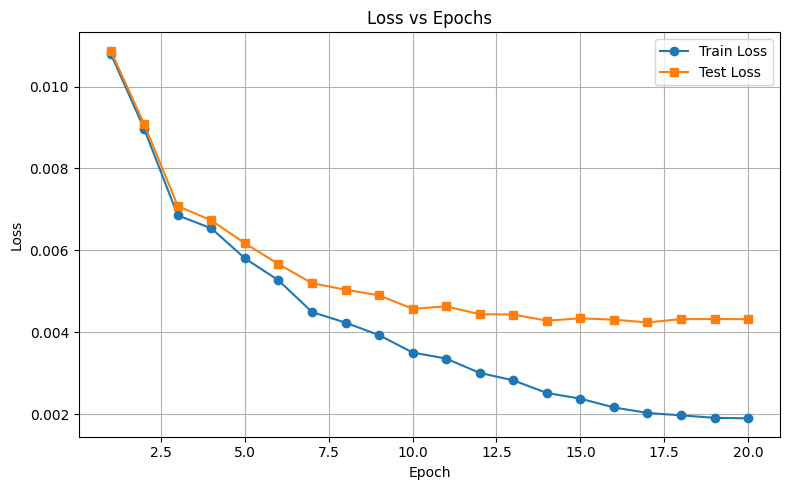

In [58]:



# model with Dropout
model_dropout = AlexNet(use_dropout=True).to(device)
optimizer = optim.Adam(model_dropout.parameters(), lr=0.001, weight_decay=1e-4)
train(model_dropout,train_loader_cifar10,test_loader_cifar10,optimizer,criterion,epoch=20,device=device) 



accuracy with out dropout
Accuracy on test set: 82.48 % Loss total on test set: 50.36
accuracy with dropout
Accuracy on test set: 83.98 % Loss total on test set: 41.59


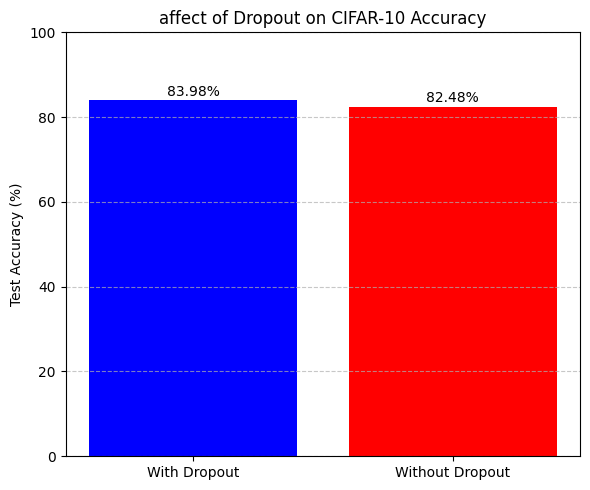

In [59]:
# visualize the result
print('accuracy with out dropout')
model_no_dropout.eval()
test(test_loader_cifar10,model_no_dropout,criterion,nm='test',device=device)

print('accuracy with dropout')
model_dropout.eval()
test(test_loader_cifar10,model_dropout,criterion,nm='test',device=device)


import matplotlib.pyplot as plt


models = ['With Dropout', 'Without Dropout']
accuracies = [get_acc(test_loader_cifar10, model_dropout,criterion, device=device), get_acc(test_loader_cifar10, model_no_dropout,criterion, device=device)]

plt.figure(figsize=(6, 5))
bars = plt.bar(models, accuracies, color=['blue', 'red'])

plt.title('affect of Dropout on CIFAR-10 Accuracy')
plt.ylabel('Test Accuracy (%)')
plt.ylim(0, 100)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 Correctly Classified Images:


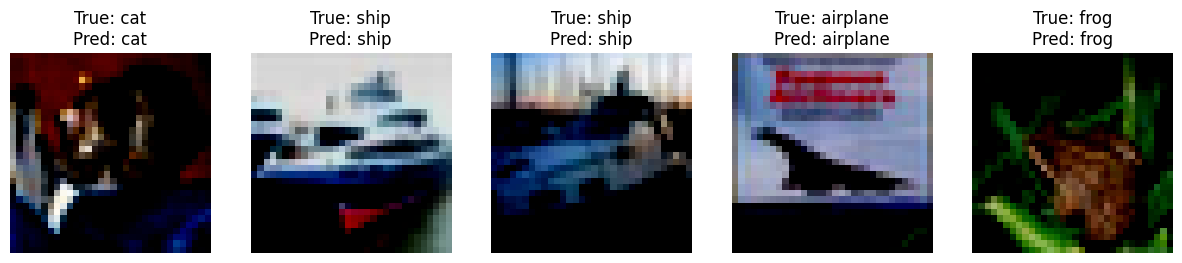

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Misclassified Images:


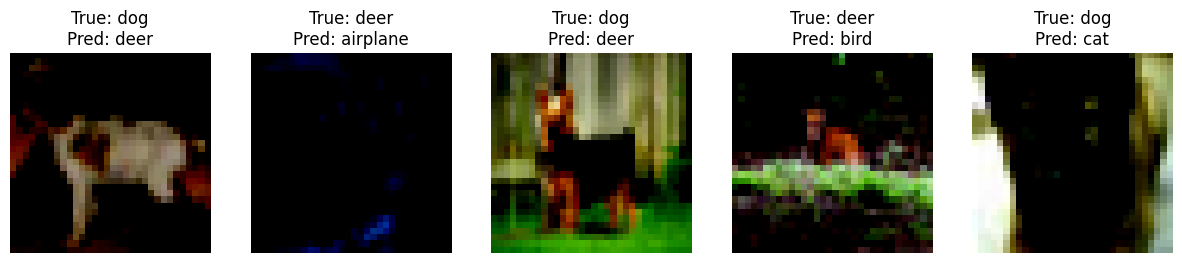

In [ ]:
# image sample visualize
import torch
import matplotlib.pyplot as plt
import numpy as np
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
def img_show(img, title):
    """show the image"""
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')

def visualize_predict(model, test_loader, classes, device='cpu', num_img=5):
    """
    visualize correctly classified and mis-sclassified images
    """
    model.eval()
    model.to(device)
    correct_imgs = []
    incorrect_imgs = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for i in range(len(images)):
                img = images[i].cpu()
                pred = preds[i].item()
                true = labels[i].item()
                if pred == true and len(correct_imgs) < num_img:
                    correct_imgs.append((img, true, pred))
                elif pred != true and len(incorrect_imgs) < num_img:
                    incorrect_imgs.append((img, true, pred))

            if len(correct_imgs) >= num_img and len(incorrect_imgs) >= num_img:
                break

    print(" Correctly Classified Images:")
    plt.figure(figsize=(15, 4))
    for idx, (img, true, pred) in enumerate(correct_imgs):
        plt.subplot(1, num_img, idx+1)
        img_show(img, f'True: {classes[true]}\nPred: {classes[pred]}')

    plt.show()

    print("Misclassified Images:")
    plt.figure(figsize=(15, 4))
    for idx, (img, true, pred) in enumerate(incorrect_imgs):
        plt.subplot(1, num_img, idx+1)
        img_show(img, f'True: {classes[true]}\nPred: {classes[pred]}')

    plt.show()

visualize_predict(model_dropout,test_loader_cifar10,class_names)

As we can see from the figure above the model with dropout has better performance. From the train loss&accuracy figure we can also find out that the model without dropout is overfitted which performance as the training accuracy&loss and testing accuracy&loss has a huge gap.

## Q. No. 8 Fine-Tuning VGG16 on CIFAR-100

In [1]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # VGG16 input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset_cifar100 = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset_cifar100 = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader_cifar100 = DataLoader(train_dataset_cifar100, batch_size=128, shuffle=True)
test_loader_cifar100 = DataLoader(test_dataset_cifar100, batch_size=128, shuffle=False)


In [4]:
import torchvision.models as models
import torch.nn as nn

def build_vgg16_model(freeze_features=True):

    """
    create the VGG16 build pretrained on imagenet
    """
    model = models.vgg16(pretrained=True)
    # change the number of the class to adapt for cifar100 (100 class)
    model.classifier[6] = nn.Linear(4096, 100)

    if freeze_features:# feature extraction
        for param in model.features.parameters():
            param.requires_grad = False
    else:
        # fine-tune 
        for param in model.features[:24]:  # freeze first 24 layers
            param.requires_grad = False

    return model


In [5]:
import torch
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#train model with Feature Extraction 
model_feature = build_vgg16_model(freeze_features=True).to(device)
optimizer_feature = optim.Adam(filter(lambda p: p.requires_grad, model_feature.parameters()), lr=0.001)
criterion = nn.CrossEntropyLoss()

print("Training with Feature Extraction")
train(model_feature, train_loader_cifar100, test_loader_cifar100, optimizer_feature, criterion, epoch=6, plot=0, device=device)




/home/chunjielu/miniconda3/envs/MyPytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/chunjielu/miniconda3/envs/MyPytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training with Feature Extraction
epoch: 0 loss:946.835  Accuracy on train set: 49.82 % Loss total on train set: 714.61
epoch: 3 loss:361.725  Accuracy on train set: 78.33 % Loss total on train set: 280.62


In [ ]:
# train fine-tuning model
model_finetune = build_vgg16_model(freeze_features=False).to(device)
optimizer_finetune = optim.Adam(filter(lambda p: p.requires_grad, model_finetune.parameters()), lr=0.0001)

print("\nTraining with Fine-Tuning")
train(model_finetune, train_loader_cifar100, test_loader_cifar100, optimizer_finetune, criterion, epoch=6, plot=0, device=device)


Training with Fine-Tuning
epoch: 0 loss:754.895  Accuracy on train set: 70.21 % Loss total on train set: 393.49
epoch: 3 loss:80.449  Accuracy on train set: 95.93 % Loss total on train set: 51.94


In [8]:
print('model with Feature extraction')
model_feature.eval()
test(test_loader_cifar100,model_feature,criterion,nm='test',device=device)

print('model with Fine-tuning')
model_finetune.eval()
test(test_loader_cifar100,model_finetune,criterion,nm='test',device=device)

model with Feature extraction
Accuracy on test set: 64.49 % Loss total on test set: 104.62
model with Fine-tuning
Accuracy on test set: 77.55 % Loss total on test set: 88.46


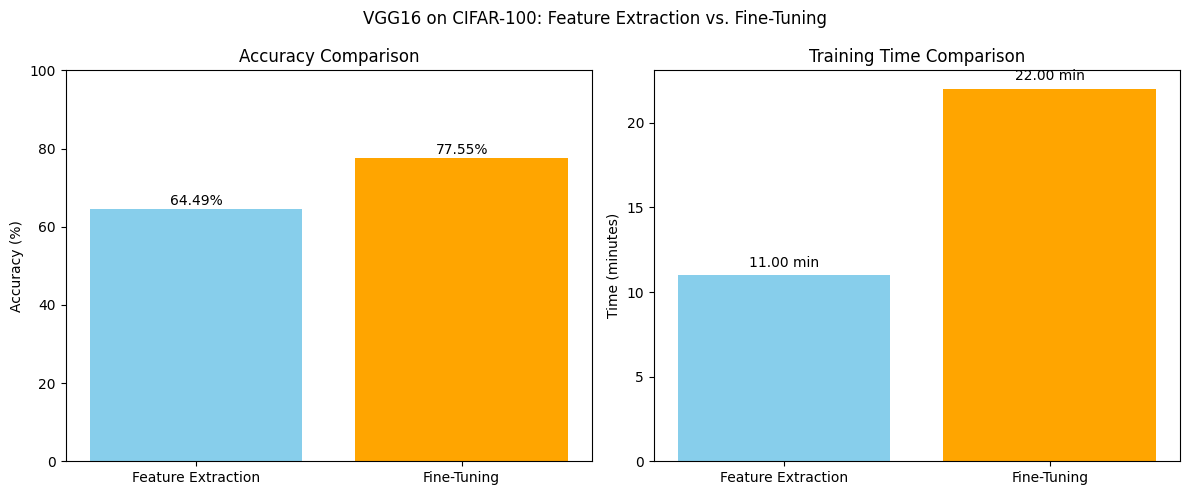

In [10]:
import matplotlib.pyplot as plt

def compare_accuracy_and_time(acc_feature, acc_finetune, time_feature, time_finetune):

    """
    comparsion of feature extraction and fine-tuning with their accuracy and training time
    """
    strategies = ['Feature Extraction', 'Fine-Tuning']
    accuracies = [acc_feature, acc_finetune]
    times = [time_feature, time_finetune]
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    # accuracy comparsion
    bars1 = axs[0].bar(strategies, accuracies, color=['skyblue', 'orange'])
    axs[0].set_title('Accuracy Comparison')
    axs[0].set_ylabel('Accuracy (%)')
    axs[0].set_ylim(0, 100)
    for bar in bars1:
        yval = bar.get_height()
        axs[0].text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center')

    # training time comparsion
    bars2 = axs[1].bar(strategies, times, color=['skyblue', 'orange'])
    axs[1].set_title('Training Time Comparison')
    axs[1].set_ylabel('Time (minutes)')
    for bar in bars2:
        yval = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f} min', ha='center')

    plt.suptitle('VGG16 on CIFAR-100: Feature Extraction vs. Fine-Tuning')
    plt.tight_layout()
    plt.show()


compare_accuracy_and_time(acc_feature=64.49, acc_finetune=77.55, time_feature=11, time_finetune=22)


as we can see from figure above fine-tuning spend more training time but has better performance on test set

## Q. No. 9 Using MobileNetV12 for Custom Data (Flowers Dataset)

In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

transform_train = transforms.Compose([
    # data agumention
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# data loading
dataset = datasets.ImageFolder('flower_photos', transform=transform_train)
class_names = dataset.classes

# split training and testing set
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset_flower, val_dataset_flower = random_split(dataset, [train_size, val_size])


val_dataset_flower.dataset.transform = transform_test

train_loader_flower = DataLoader(train_dataset_flower, batch_size=32, shuffle=True)
val_loader_flower = DataLoader(val_dataset_flower, batch_size=32, shuffle=False)


In [ ]:
import torchvision.models as models
import torch.nn as nn

def get_mobilenetv2(num_classes=5, freeze=True):
    """
    load mobilenetv2 model pretrained on imageNet
    """
    model = models.mobilenet_v2(pretrained=True)
    if freeze:
        for param in model.features.parameters():# freeze the layer
            param.requires_grad = False
    model.classifier[1] = nn.Linear(model.last_channel, num_classes) # change the number of the output
    return model



In [ ]:
import torch
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
learning_rates = [1e-2, 1e-3, 1e-4]
results = {

}# result of test loss and accuracy
def train_p(model,train_loader,test_loader,optimizer,criterion,epoch=10,plot=1,device='cpu'):
    """
    train function
    """
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epoch)# schedular
    train_loss=[]
    test_loss=[]

    train_acc=[]
    test_acc=[]
    for i in range(epoch):
        model.train()
        running_loss = 0.0 
        for batch_idx, data in enumerate(train_loader, 0):
            inputs, target = data
            inputs, target = inputs.to(device) , target.to(device)
            optimizer.zero_grad()
            #print(batch_idx)

            # forward + backward + update
            outputs = model(inputs)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        # select a fit number to show the loss
        if i%3==0 :
            print('epoch: %d loss:%.3f ' % (i,running_loss), end=' ')
            test(train_loader,model,criterion,nm='train',device=device)
        scheduler.step()

        

        train_loss.append(get_loss(train_loader, model,criterion, device))
        test_loss.append(get_loss(test_loader, model,criterion, device))
        train_acc.append(get_acc(train_loader, model,criterion, device))
        test_acc.append(get_acc(test_loader, model,criterion, device))
    
    return train_loss,test_loss,train_acc,test_acc

for lr in learning_rates:
    # train and test the model with different learning rate
    model = get_mobilenetv2(num_classes=len(class_names), freeze=True).to(device)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
    train_loss,test_loss,train_acc,test_acc=train_p(model, train_loader_flower, val_loader_flower, optimizer, criterion, epoch=5, plot=0, device=device)
    results[f"{lr:.0e}"] = {
        "acc": test_acc,
        "loss": test_loss
    }

    acc=get_acc(val_loader_flower, model,criterion, device=device)
    print(f'model with learning rate: {lr}, acc: {acc}')



import matplotlib.pyplot as plt

def plot_lr_curves(results):
    # visualization comparsion with different learning rate
    epochs = range(1, len(next(iter(results.values()))['acc']) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    for lr, data in results.items():
        plt.plot(epochs, data['acc'], label=f"lr={lr}")
    plt.title("Validation Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True)
    plt.subplot(1, 2, 2)
    for lr, data in results.items():
        plt.plot(epochs, data['loss'], label=f"lr={lr}")
    plt.title("Validation Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    

/home/chunjielu/miniconda3/envs/MyPytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/chunjielu/miniconda3/envs/MyPytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch: 0 loss:70.021  Accuracy on train set: 84.84 % Loss total on train set: 43.41
epoch: 3 loss:24.605  Accuracy on train set: 91.86 % Loss total on train set: 21.27
model with learning rate: 0.01, acc: 87.87465940054496
epoch: 0 loss:68.117  Accuracy on train set: 85.49 % Loss total on train set: 41.35
epoch: 3 loss:27.821  Accuracy on train set: 90.46 % Loss total on train set: 26.71
model with learning rate: 0.001, acc: 87.19346049046321
epoch: 0 loss:128.725  Accuracy on train set: 68.63 % Loss total on train set: 104.72
epoch: 3 loss:68.560  Accuracy on train set: 81.71 % Loss total on train set: 67.03
model with learning rate: 0.0001, acc: 81.19891008174388


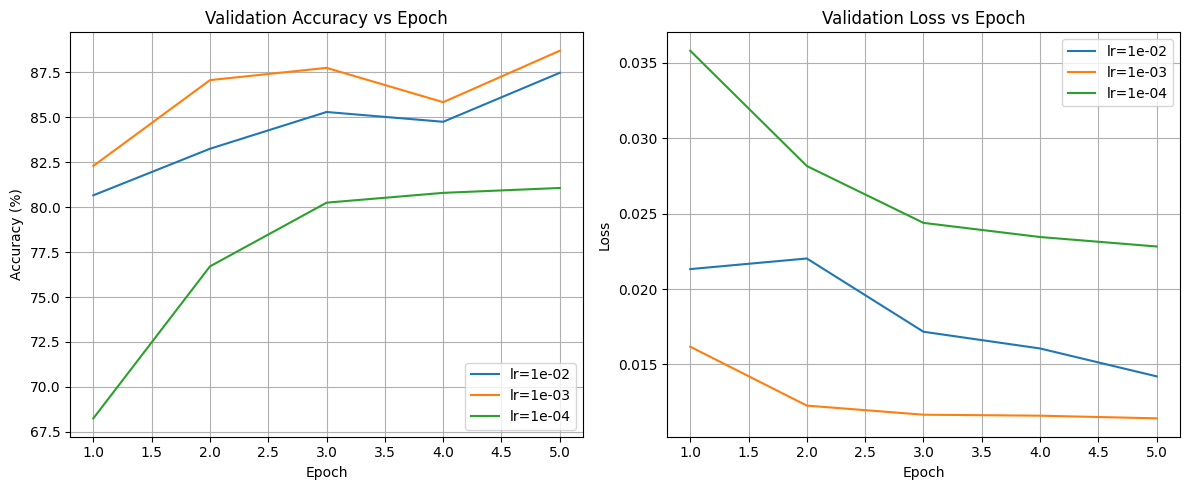

In [24]:
plot_lr_curves(results)

as we can see from figure above I train the model with the same number of epochs which is 5, larger learning rate may make the model converges faster.

## Q. No. 10 Comparing Pretrained Models (ResNet50 vs. EfficientNetB0)

In [ ]:

class custom_head(nn.Module):
    """
    Add a custom classifier head
    """
    def __init__(self, in_features, num_classes=10):
        super().__init__()
        self.head = nn.Sequential(
            nn.Linear(in_features, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.head(x)


def load_model(model_name='resnet50'):
    """
    load the model resnet50 or efficientnet_b0
    """
    if model_name == 'resnet50':

        bs_model = models.resnet50(weights='IMAGENET1K_V1')
        in_features = bs_model.fc.in_features
        bs_model.fc = custom_head(in_features, num_classes=10)

    elif model_name == 'efficientnet_b0':

        bs_model = models.efficientnet_b0(weights='IMAGENET1K_V1')
        in_features = bs_model.classifier[1].in_features
        bs_model.classifier = custom_head(in_features, num_classes=10)
    return bs_model

def para_set(model, feature_extracting):
    """
    set feature extract
    """
    if feature_extracting:
        # ResNet50
        if hasattr(model, 'fc'):
            for name, param in model.named_parameters():
                if not name.startswith("fc"):
                    param.requires_grad = False
        # EfficientNet
        elif hasattr(model, 'classifier'):
            for name, param in model.named_parameters():
                if not name.startswith("classifier"):
                    param.requires_grad = False
def train_p(model,train_loader,test_loader,optimizer,criterion,epoch=10,plot=1,device='cpu'):
    """
    train function
    """
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epoch)# schedular
    train_loss=[]
    test_loss=[]

    train_acc=[]
    test_acc=[]
    for i in range(epoch):
        model.train()
        running_loss = 0.0 
        for batch_idx, data in enumerate(train_loader, 0):
            inputs, target = data
            inputs, target = inputs.to(device) , target.to(device)
            optimizer.zero_grad()
            #print(batch_idx)

            # forward + backward + update
            outputs = model(inputs)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        # select a fit number to show the loss
        if i%3==0 :
            print('epoch: %d loss:%.3f ' % (i,running_loss), end=' ')
            test(train_loader,model,criterion,nm='train',device=device)
        scheduler.step()

        

        train_loss.append(get_loss(train_loader, model,criterion, device))
        test_loss.append(get_loss(test_loader, model,criterion, device))
        train_acc.append(get_acc(train_loader, model,criterion, device))
        test_acc.append(get_acc(test_loader, model,criterion, device))
    
    return train_loss,test_loss,train_acc,test_acc



=== RESNET50 ===
use fine_tune
epoch: 0 loss:381.265  Accuracy on train set: 75.48 % Loss total on train set: 284.32
epoch: 3 loss:183.890  Accuracy on train set: 86.38 % Loss total on train set: 158.12
epoch: 6 loss:93.023  Accuracy on train set: 93.15 % Loss total on train set: 79.86
Total Trainable Parameters: 24035146
Training Time: 206.56 seconds

=== EFFICIENTNET_B0 ===
use fine_tune
epoch: 0 loss:411.056  Accuracy on train set: 75.90 % Loss total on train set: 276.05
epoch: 3 loss:178.430  Accuracy on train set: 86.33 % Loss total on train set: 155.94
epoch: 6 loss:102.237  Accuracy on train set: 91.83 % Loss total on train set: 91.63
Total Trainable Parameters: 4338054
Training Time: 204.69 seconds


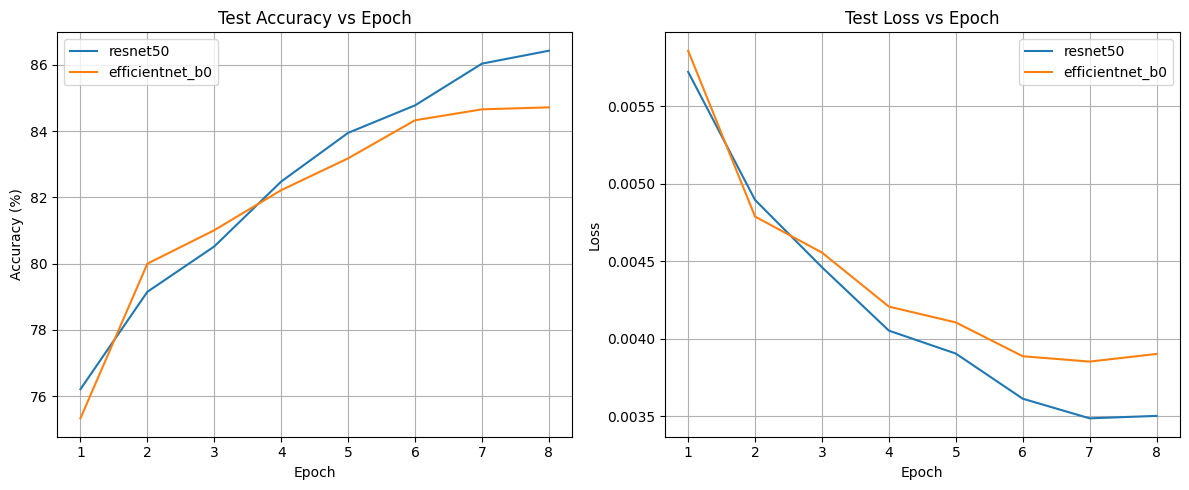

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
models_to_test = ['resnet50', 'efficientnet_b0']


result_10={}
for name in models_to_test:
    print(f"\n=== {name.upper()} ===")
    model = load_model(name).to(device)

    for mode in ['fine_tune']:
        print(f"use {mode}")
        para_set(model, feature_extracting=(mode == 'feature_extract'))

        optimizer = torch.optim.Adam(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=1e-3 if mode == 'fine_tune' else 1e-2
        )
        criterion = nn.CrossEntropyLoss()

        # record training time
        import time
        start = time.time()

        train_loss,test_loss,train_acc,test_acc=train_p(
            model=model,
            train_loader=train_loader_cifar10,
            test_loader=test_loader_cifar10,
            optimizer=optimizer,
            criterion=criterion,
            epoch=8,
            plot=0,
            device=device
        )
        result_10[name] = {
        "acc": test_acc,
        "loss": test_loss
    }

        du_time = time.time() - start
        num_p = sum(p.numel() for p in model.parameters() if p.requires_grad) # number of parameters

        print(f"Total Trainable Parameters: {num_p}")
        print(f"Training Time: {du_time:.2f} seconds")
    # save the model（state_dict）
    torch.save(model.state_dict(), f'model_{name}.pth')


import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_model_comparison(results):
    """
    compare the loss and accuracy of the model
    """
    epochs = range(1, len(next(iter(results.values()))['acc']) + 1)
    plt.figure(figsize=(12, 5))

    # accuracy
    plt.subplot(1, 2, 1)
    for model_name, data in results.items():
        plt.plot(epochs, data['acc'], label=model_name)
    plt.title("Test Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True)

    # loss
    plt.subplot(1, 2, 2)
    for model_name, data in results.items():
        plt.plot(epochs, data['loss'], label=model_name)
    plt.title("Test Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


plot_model_comparison(result_10)




confusion matrix for efficientnet_b0: 
Accuracy on test set: 84.85 % Loss total on test set: 38.95


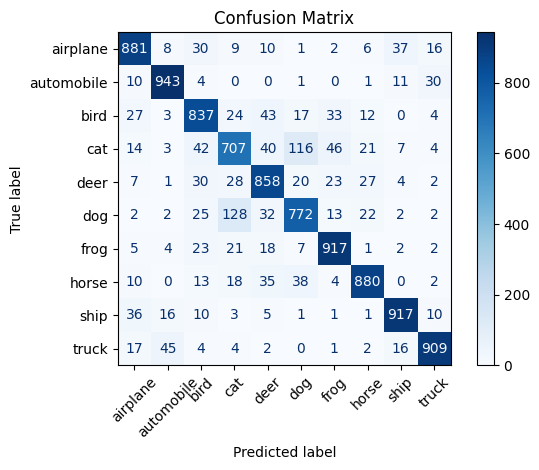

confusion matrix for ResNet50: 
Accuracy on test set: 86.43 % Loss total on test set: 35.03


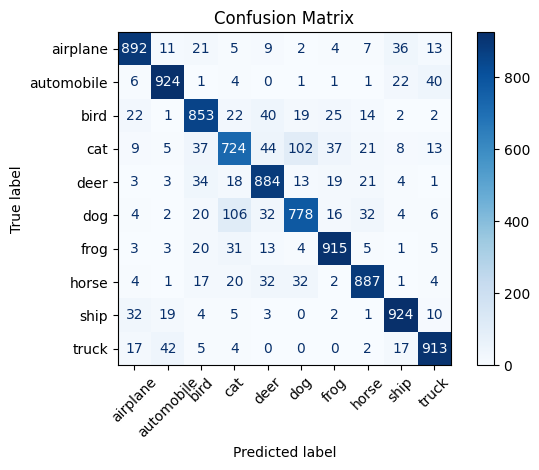

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch

def plot_confusion_matrix(model, dataloader, classes, device='cpu'):
    all_preds = []
    all_labels = []

    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(xticks_rotation=45, cmap='Blues')
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.tight_layout()
    plt.show()



print('confusion matrix for efficientnet_b0: ')
model_eff = load_model('efficientnet_b0').to(device)
para_set(model_eff, feature_extracting=False)  
model_eff.load_state_dict(torch.load('model_efficientnet_b0.pth'))  # 如果保存了模型
test(test_loader_cifar10,model_eff,criterion,nm='test',device=device)
# name of the class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plot_confusion_matrix(model_eff, test_loader_cifar10, class_names, device)


print('confusion matrix for ResNet50: ')
model_res = load_model('resnet50').to(device)
para_set(model_res, feature_extracting=False)  
model_res.load_state_dict(torch.load('model_resnet50.pth'))  
test(test_loader_cifar10,model_res,criterion,nm='test',device=device)
plot_confusion_matrix(model_res, test_loader_cifar10, class_names, device)

due to my test above with fine-tuning(unfreeze some deeper layers and train further), ResNet50 has more training parameters but the train time of ResNet50 and EfficientNetB0 is quite similar maybe that is due to I train on my GPU(RTX 4080). Their performance on test is also similar which have around 85% of acuracy. However if I just do feature extraction (freeze convolutional layers, train only the new classifier) the result is not good(code below).

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
models_to_test = ['resnet50', 'efficientnet_b0']


result_11={}
for name in models_to_test:
    print(f"\n=== {name.upper()} ===")
    model = load_model(name).to(device)
# TEST with feature extraction
    for mode in ['feature_extract']:
        print(f"use {mode}")
        para_set(model, feature_extracting=(mode == 'feature_extract'))

        optimizer = torch.optim.Adam(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=1e-3 if mode == 'fine_tune' else 1e-2
        )
        criterion = nn.CrossEntropyLoss()

        # record training time
        import time
        start = time.time()

        train_loss,test_loss,train_acc,test_acc=train_p(
            model=model,
            train_loader=train_loader_cifar10,
            test_loader=test_loader_cifar10,
            optimizer=optimizer,
            criterion=criterion,
            epoch=20,
            plot=0,
            device=device
        )
        result_10[name] = {
        "acc": test_acc,
        "loss": test_loss
    }

        du_time = time.time() - start
        num_p = sum(p.numel() for p in model.parameters() if p.requires_grad) # number of parameters

        print(f"Total Trainable Parameters: {num_p}")
        print(f"Training Time: {du_time:.2f} seconds")









=== RESNET50 ===
use feature_extract
epoch: 0 loss:803.977  Accuracy on train set: 32.56 % Loss total on train set: 715.31
epoch: 3 loss:661.895  Accuracy on train set: 37.55 % Loss total on train set: 675.23
epoch: 6 loss:649.071  Accuracy on train set: 39.76 % Loss total on train set: 639.96
epoch: 9 loss:638.511  Accuracy on train set: 40.71 % Loss total on train set: 628.98
epoch: 12 loss:624.252  Accuracy on train set: 41.28 % Loss total on train set: 628.23
epoch: 15 loss:617.472  Accuracy on train set: 41.90 % Loss total on train set: 614.94
epoch: 18 loss:613.825  Accuracy on train set: 42.48 % Loss total on train set: 611.16
Total Trainable Parameters: 527114
Training Time: 459.64 seconds

=== EFFICIENTNET_B0 ===
use feature_extract
epoch: 0 loss:804.051  Accuracy on train set: 31.07 % Loss total on train set: 791.88
epoch: 3 loss:784.434  Accuracy on train set: 33.12 % Loss total on train set: 766.76
epoch: 6 loss:755.085  Accuracy on train set: 34.31 % Loss total on train s

## Q. No. 11 Implementing a Custom CNN vs. Transfer Learning

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# for CNN
CNN_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor()
])

# for VGG16
vgg_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.Grayscale(num_output_channels=3),  # turn into 3 channels
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# data loading
train_CNN = datasets.FashionMNIST(root='./data', train=True, download=True, transform=CNN_transform)
test_CNN = datasets.FashionMNIST(root='./data', train=False, download=True, transform=CNN_transform)
train_vgg = datasets.FashionMNIST(root='./data', train=True, download=True, transform=vgg_transform)
test_vgg = datasets.FashionMNIST(root='./data', train=False, download=True, transform=vgg_transform)

train_loader_CNN = DataLoader(train_CNN, batch_size=64, shuffle=True)
test_loader_CNN = DataLoader(test_CNN, batch_size=64, shuffle=False)
train_loader_vgg = DataLoader(train_vgg, batch_size=64, shuffle=True)
test_loader_vgg = DataLoader(test_vgg, batch_size=64, shuffle=False)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)  
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)                                
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1) 
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)                                

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  
        return x


from torchvision import models

def vgg16_transfer(num_classes=10, freeze=True):
    """
    vgg pretrained model
    """
    model = models.vgg16(weights="IMAGENET1K_V1")
    if freeze:
        for param in model.features.parameters():
            param.requires_grad = False

    # custom head
    model.classifier[6] = nn.Sequential(
        nn.Linear(4096, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, num_classes)
    )
    return model



epoch: 0 loss:434.794  Accuracy on train set: 87.53 % Loss total on train set: 322.42
epoch: 3 loss:205.031  Accuracy on train set: 93.28 % Loss total on train set: 176.00
epoch: 6 loss:137.372  Accuracy on train set: 95.17 % Loss total on train set: 126.49
epoch: 9 loss:101.940  Accuracy on train set: 96.34 % Loss total on train set: 99.45


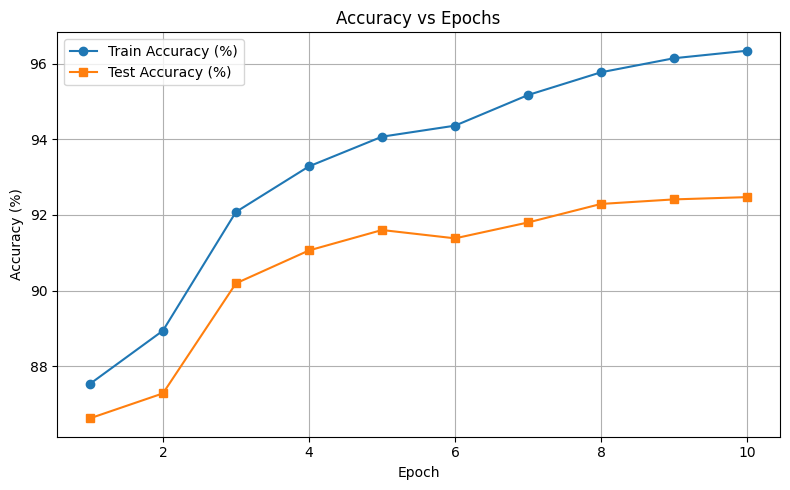

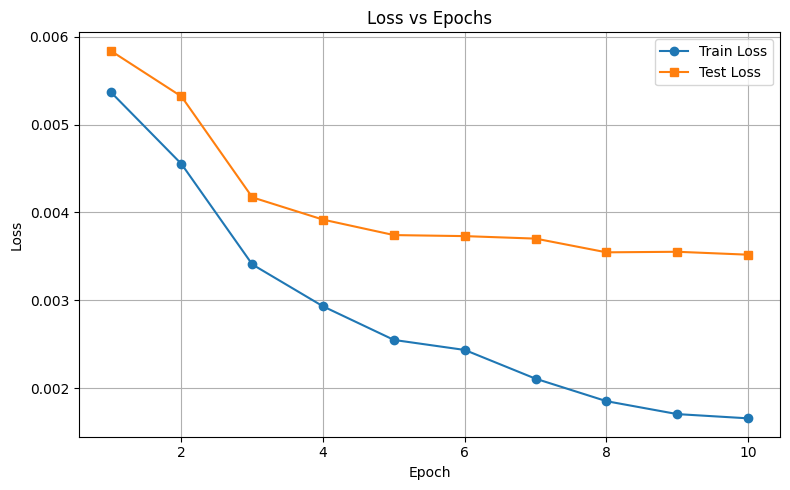

In [ ]:
# test the CNN model
model_CNN = CNN().to(device)
optimizer1 = torch.optim.Adam(model_CNN.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
train(model_CNN, train_loader_CNN, test_loader_CNN, optimizer1, criterion, epoch=10, plot=1, device=device)




Accuracy on  set: 92.47 % Loss total on  set: 35.20


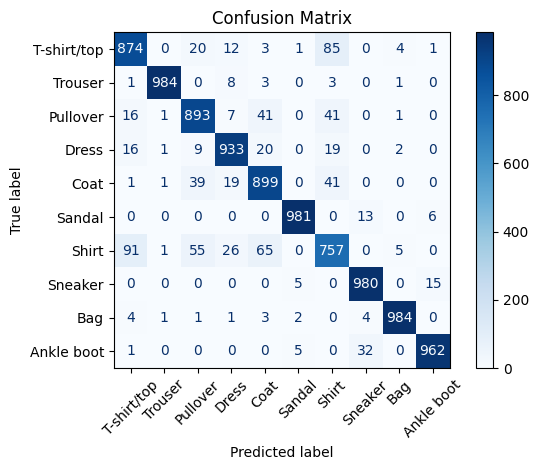

In [62]:
model_CNN.eval()
class_names = [
    "T-shirt/top",    # 0
    "Trouser",        # 1
    "Pullover",       # 2
    "Dress",          # 3
    "Coat",           # 4
    "Sandal",         # 5
    "Shirt",          # 6
    "Sneaker",        # 7
    "Bag",            # 8
    "Ankle boot"      # 9
]

test(test_loader_CNN,model_CNN,criterion,nm='',device=device)
plot_confusion_matrix(model_CNN, test_loader_CNN, class_names, device)

epoch: 0 loss:437.432  Accuracy on train set: 86.99 % Loss total on train set: 358.19


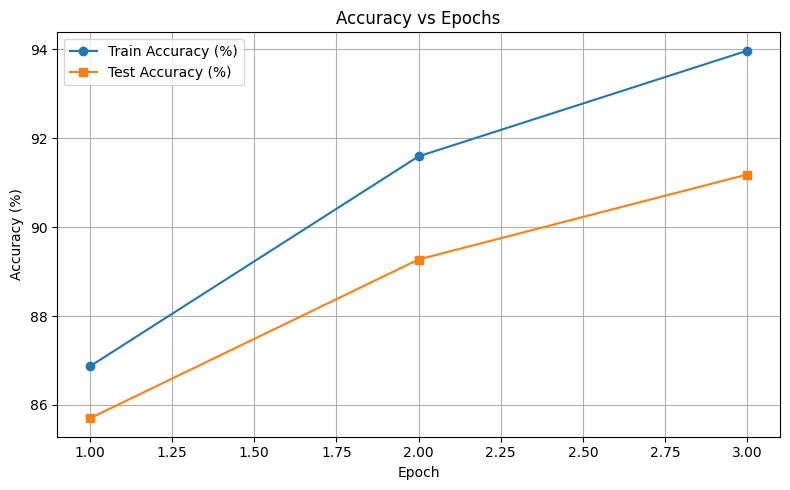

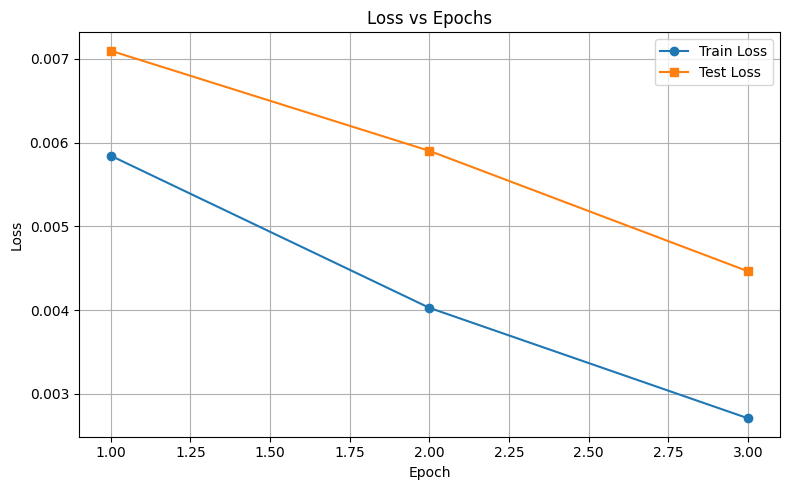

In [ ]:
# test vgg model
model_vgg = vgg16_transfer().to(device)
optimizer2 = torch.optim.Adam(filter(lambda p: p.requires_grad, model_vgg.parameters()), lr=1e-3)
train(model_vgg, train_loader_vgg, test_loader_vgg, optimizer2, criterion, epoch=3, plot=1, device=device)

Accuracy on  set: 92.31 % Loss total on  set: 35.52


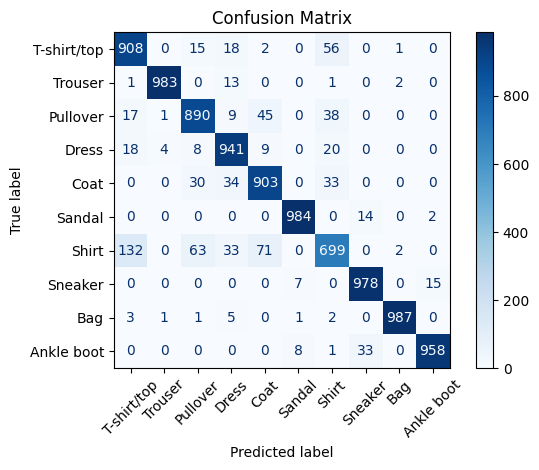

In [63]:
model_vgg.eval()
test(test_loader_vgg,model_vgg,criterion,nm='',device=device)
plot_confusion_matrix(model_vgg, test_loader_vgg, class_names, device)

from the test result above transfer learning by Vgg16(fine-tune with 3 epoch) has such a good performance(above 90% on test set) and so does CNN. fine-tuning on vgg16 spend much more time(18min) compared with CNN(1mins) and the model of vgg16 is more complex with more parameters.